## Project 3
 ### Team:3
    
    Matt Keeley
    Jenny Yang
    Shay Masood
    Shreyansh Saraiya
    Fatma Butun



# OVERVIEW

### Here we aim to predict whether a breast tumor is benign or malignant based on certain cell features by using Machine Learning algorithm.
### The result will be published on heroku

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
import joblib

# Read csv and do data cleaning

In [2]:
breast_cancer_df = pd. read_csv("breast_cancer_data.csv")

In [3]:
breast_cancer_df.shape

(569, 33)

In [4]:
breast_cancer_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
# Drop the null columns where all values are null
breast_cancer_df = breast_cancer_df.dropna(axis='columns', how='all')
# Drop the null rows
breast_cancer_df = breast_cancer_df.dropna()
breast_cancer_df.shape

(569, 32)

In [6]:
# define the output as target
target = breast_cancer_df["diagnosis"]
# target.head()

In [7]:
# define input, begin with all inputs

features = breast_cancer_df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

In [8]:
## make synthetic data

# # Fit a kernel density model using GridSearchCV to determine the best parameter for bandwidth
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KernelDensity
# bandwidth_params = {'bandwidth': np.arange(0.01,1,0.05)}
# grid_search = GridSearchCV(KernelDensity(), bandwidth_params)
# grid_search.fit(features)
# kde = grid_search.best_estimator_


In [9]:
# # Generate/sample 100 new faces from this dataset
# synthetic_data = kde.sample(100, random_state=42)

# synthetic_data = pd.DataFrame(synthetic_data, columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
#        'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
#        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
#        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
#        'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
#        'fractal_dimension_se', 'radius_worst', 'texture_worst',
#        'perimeter_worst', 'area_worst', 'smoothness_worst',
#        'compactness_worst', 'concavity_worst', 'concave points_worst',
#        'symmetry_worst', 'fractal_dimension_worst'])

In [10]:
# split the data

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

In [11]:
# scale the data

X_scaler = StandardScaler().fit(X_train)


In [12]:
# Transform the training and testing data using the X_scaler model

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [14]:
# Convert encoded labels to one-hot-encoding

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)



In [15]:
# test with one model - Here, Random Classifier 
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train_categorical)
rf.score(X_test_scaled, y_test_categorical)

0.972027972027972

In [16]:
# # check the importance of the features and remove the least important ones ( result was very similar so I did not do it)
# sorted(zip(rf.feature_importances_, features), reverse=True)

### Use PCA to remove least important columns

In [17]:
# Use PCA to perform Dimensionality Reduction
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_scaled)

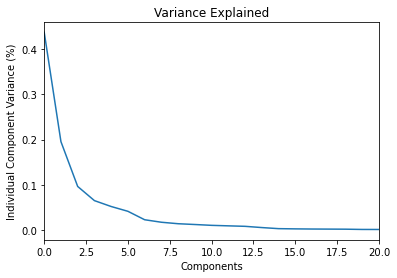

In [18]:
# Plot each component's variance
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Components')
plt.ylabel('Individual Component Variance (%)')
plt.xlim((0,20))
plt.title('Variance Explained')
plt.show()

In [19]:
# Check each component's importance
variance_ratio = pca.explained_variance_ratio_
components = features.columns.to_list()
component_variance_ratio = dict(zip(components,variance_ratio))
dict(sorted(component_variance_ratio.items(), key=lambda item: item[1]))
print ("the variance for each component : ")
component_variance_ratio

the variance for each component : 


{'radius_mean': 0.4373647988628963,
 'texture_mean': 0.19531369757408704,
 'perimeter_mean': 0.09618004832578814,
 'area_mean': 0.06482796310133533,
 'smoothness_mean': 0.05180713186743027,
 'compactness_mean': 0.04118450597076681,
 'concavity_mean': 0.022521299113847062,
 'concave points_mean': 0.016984757674569848,
 'symmetry_mean': 0.013707199992682316,
 'fractal_dimension_mean': 0.011970568613961693,
 'radius_se': 0.010116141210417361,
 'texture_se': 0.009014011296054291,
 'perimeter_se': 0.00794309002431327,
 'area_se': 0.005209081021802496,
 'smoothness_se': 0.002808416218547464,
 'compactness_se': 0.0023075972865315326,
 'concavity_se': 0.0019625927753066734,
 'concave points_se': 0.0017897033070850713,
 'symmetry_se': 0.0016178177149837186,
 'fractal_dimension_se': 0.0010490433001594946,
 'radius_worst': 0.0009795264293235774,
 'texture_worst': 0.0008891776950734129,
 'perimeter_worst': 0.00082736163444342,
 'area_worst': 0.0005647514949979669,
 'smoothness_worst': 0.0004913931

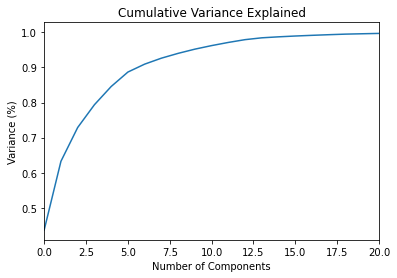

In [20]:
# Plot Cumulative Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.xlim((0,20))
plt.title('Cumulative Variance Explained')
plt.show()

In [21]:
# Pick 15 features to retain 95.4% variance
print (np.cumsum(pca.explained_variance_ratio_))

[0.4373648  0.6326785  0.72885854 0.79368651 0.84549364 0.88667815
 0.90919944 0.9261842  0.9398914  0.95186197 0.96197811 0.97099212
 0.97893521 0.98414429 0.98695271 0.98926031 0.9912229  0.9930126
 0.99463042 0.99567947 0.99665899 0.99754817 0.99837553 0.99894028
 0.99943168 0.99969702 0.99992302 0.99997118 0.99999606 1.        ]


In [22]:
# Tranform data to reduced components
pca = PCA(n_components=10)
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.fit_transform(X_test_scaled)
print(X_train_scaled_pca.shape,X_test_scaled_pca.shape)
print(y_train_categorical.shape,y_test_categorical.shape)

(426, 10) (143, 10)
(426, 2) (143, 2)


In [23]:
# remove the bottom 15 features and create a new train test set 
# for the tested model this did not create a better outcome 

# remove features according their importance in PCA 
features_removed = breast_cancer_df[['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se']]

In [24]:
# save the scaler
filename = 'scaler_allfeatures.sav'
joblib.dump(X_scaler, filename)

['scaler_allfeatures.sav']

In [25]:
# Uncomment this code to load the scaler with all features 
# X_scaler = joblib.load("scaler_allfeatures.sav")

In [26]:
# Uncomment this code to load the scaler with some features removed 
# X_scaler_r = joblib.load("scaler_features_removed.sav")

In [27]:
# save train test data set for input with all features as csv file
from numpy import asarray
from numpy import savetxt

savetxt('X_train_scaled.csv', X_train_scaled, delimiter=',')
savetxt('X_test_scaled.csv', X_test_scaled , delimiter=',')
savetxt('y_train_categorical.csv', y_train_categorical , delimiter=',')
savetxt('y_test_categorical.csv', y_test_categorical , delimiter=',')

In [28]:

# # to load numpy array from csv file uncomment this cell
# from numpy import loadtxt

# X_train_scaled = loadtxt('X_train_scaled.csv', delimiter=',')
# X_test_scaled = loadtxt('X_test_scaled.csv', delimiter=',')
# y_train_categorical = loadtxt('y_train_categorical.csv', delimiter=',')
# y_test_categorical = loadtxt('y_test_categorical.csv', delimiter=',')

In [29]:
# save train test data set for input with some features removed as csv file. The output file is already saved.
from numpy import asarray
from numpy import savetxt

savetxt('X_train_scaled_pca.csv', X_train_scaled_pca, delimiter=',')
savetxt('X_test_scaled_pca.csv', X_test_scaled_pca, delimiter=',')


In [30]:
# # to load numpy array from csv file uncomment this cell
# from numpy import loadtxt

# X_train_scaled_pca = loadtxt('X_train_scaled_pca.csv', delimiter=',')
# X_test_scaled_pca = loadtxt('X_test_scaled_pca.csv', delimiter=',')